2024-08-01 16:36:46.541086: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-01 16:36:47.524280: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-01 16:36:49.009117: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2024-08-01 16:36:49.009836: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or 

Found 240 images belonging to 6 classes.
Found 60 images belonging to 6 classes.


2024-08-01 16:36:52.906735: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-08-01 16:36:53.290582: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-08-01 16:36:53.290685: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-08-01 16:36:53.292440: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate

Epoch 1/50


2024-08-01 16:36:55.728463: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8600
2024-08-01 16:36:57.738091: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 3.46GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-08-01 16:36:57.738154: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 3.46GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


1/8 [==>...........................] - ETA: 2:32 - loss: 1.8803 - accuracy: 0.1250

2024-08-01 16:37:16.415002: I tensorflow/stream_executor/cuda/cuda_blas.cc:1614] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


8/8 [==============================] - 30s 1s/step - loss: 4.1116 - accuracy: 0.2083 - val_loss: 1.8817 - val_accuracy: 0.3333
Epoch 2/50
8/8 [==============================] - 3s 321ms/step - loss: 1.5882 - accuracy: 0.3208 - val_loss: 1.2566 - val_accuracy: 0.5000
Epoch 3/50
8/8 [==============================] - 3s 378ms/step - loss: 1.3158 - accuracy: 0.4458 - val_loss: 0.9883 - val_accuracy: 0.7000
Epoch 4/50
8/8 [==============================] - 4s 474ms/step - loss: 1.1920 - accuracy: 0.5458 - val_loss: 0.9176 - val_accuracy: 0.7500
Epoch 5/50
8/8 [==============================] - 4s 519ms/step - loss: 0.9438 - accuracy: 0.6833 - val_loss: 0.6856 - val_accuracy: 0.8167
Epoch 6/50
8/8 [==============================] - 3s 431ms/step - loss: 0.8543 - accuracy: 0.7667 - val_loss: 0.5348 - val_accuracy: 0.9333
Epoch 7/50
8/8 [==============================] - 4s 511ms/step - loss: 0.7787 - accuracy: 0.7708 - val_loss: 0.5419 - val_accuracy: 0.9000
Epoch 8/50
8/8 [=================

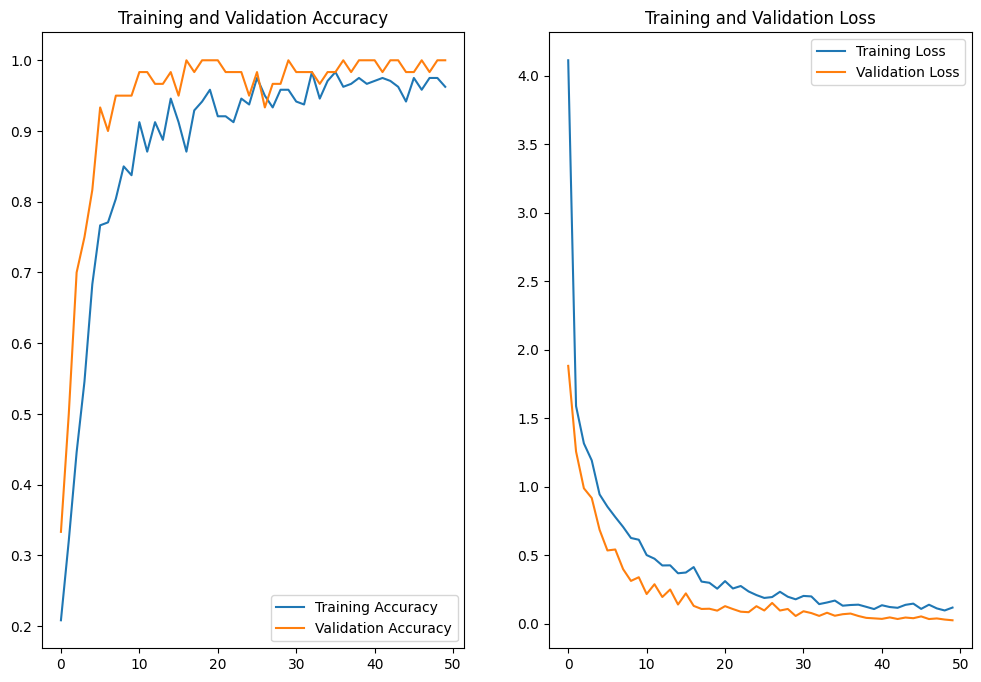

Highest Validation Accuracy: 1.0000


In [1]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import os
import matplotlib.pyplot as plt

# Define dataset directory
dataset_dir = '/home/norak/LBP+VGG16/split_dataset'
train_dir = os.path.join(dataset_dir, 'train')
validation_dir = os.path.join(dataset_dir, 'validation')

# Define parameters
batch_size = 32
img_height, img_width = 224, 224

# Data generators with augmentation for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

# Validation data generator without augmentation
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

# Load VGG16 model without the top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Freeze the base model
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top of the base model
x = Flatten()(base_model.output)
x = Dense(128, activation='relu')(x)
x = Dense(train_generator.num_classes, activation='softmax')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=x)
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
epochs = 50
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=epochs
)

# Save the model
model.save('face_recognition_vgg16.h5')

# Plot the training and validation accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Display the highest validation accuracy
highest_val_acc = max(val_acc)
print(f'Highest Validation Accuracy: {highest_val_acc:.4f}')
